# Load the Libraries & Dataset

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score


In [3]:
# import Dataset
df = pd.read_excel("churn_dataset.xlsx")
df.head()


,Age,Tenure,Sex,Churn
0,56,8,Male,No
1,46,63,Female,No
2,32,11,Female,No
3,60,8,Male,No
4,25,35,Male,No


# Preprocess the Data 

In [5]:
#Check data quality
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     100 non-null    int64 
 1   Tenure  100 non-null    int64 
 2   Sex     100 non-null    object
 3   Churn   100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


In [6]:
#Convert thecategorical column sex to numeric
df['Sex']=df['Sex'].map({'Male': 1, 'Female': 0})
#Convert the target column Churn to numeric
df['Churn']=df['Churn'].map({'No': 0, 'Yes': 1})

df


,Age,Tenure,Sex,Churn
0,56,8,1,0
1,46,63,0,0
2,32,11,0,0
3,60,8,1,0
4,25,35,1,0
...,...,...,...,...
95,24,38,0,0
96,26,24,1,0
97,41,69,0,1
98,18,70,1,0


# Train a Classification Model

In [8]:
# Use NaiveBayes model (features'x', target'y')
x = df.drop('Churn',axis=1)
y = df['Churn']


In [9]:
df['Churn'].value_counts()

Churn
0    75
1    25
Name: count, dtype: int64

In [94]:
#Split the dataset (train , test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [96]:
y_test.value_counts()

Churn
0    16
1     4
Name: count, dtype: int64

In [98]:
# Gaussian Naive-Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [100]:
# Make Prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

# Evaluate the Model

In [103]:
# evaluate performance
print(f"Accuracy: {accuracy_score(y_pred,y_test)}")

#Optionally show confusion matrix.(Bonus)


Accuracy: 0.8


In [105]:
#Optionally show confusion matrix.(Bonus)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[16,  4],
       [ 0,  0]], dtype=int64)

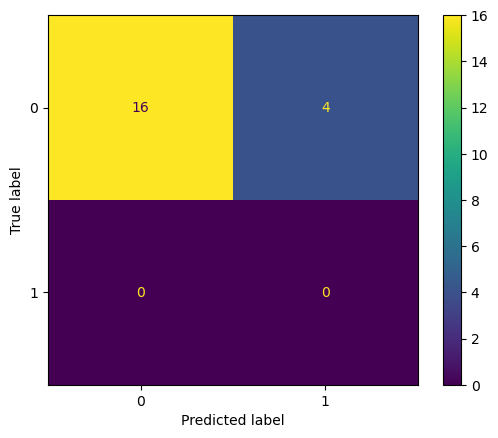

In [107]:
# show
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [115]:
#save model
import joblib

In [119]:
joblib.dump(model,'naivebayesClassifier.pkl')

['naivebayesClassifier.pkl']